In [3]:
import numpy as np
import pandas as pd 

import os 

from sklearn.preprocessing import LabelEncoder

In [4]:
INPUT = '/media/tin/DATA/Kaggle_Data/Mercedes/Input/'
OUTPUT = '/media/tin/DATA/Kaggle_Data/Mercedes/Output/'

train = pd.read_csv(os.path.join(INPUT, 'train.csv'))
test = pd.read_csv(os.path.join(INPUT, 'test.csv'))

In [5]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [79]:
#string to float
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))


original_y_train = train["y"]
original_x_train = train.drop('y', axis=1)


print('Shape train: {}\nShape test: {}\nShape original_y_train: {}\nShape original_x_train: {}'
      .format(train.shape,
              test.shape, 
              original_y_train.shape, 
              original_x_train.shape))


Shape train: (4209, 378)
Shape test: (4209, 377)
Shape original_y_train: (4209,)
Shape original_x_train: (4209, 377)


In [78]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

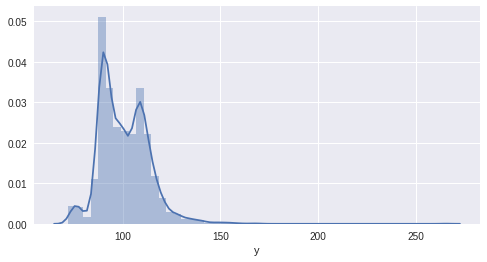

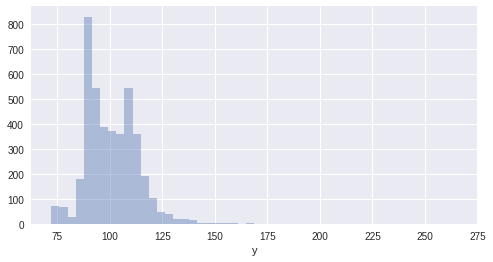

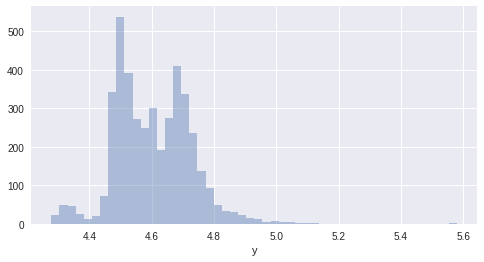

In [104]:
plt.figure(figsize=(8,4))
sns.distplot(original_y_train)
plt.show()

#no kde
plt.figure(figsize=(8,4))
sns.distplot(original_y_train, kde=False)
plt.show()

#log transformation
plt.figure(figsize=(8,4))
sns.distplot(np.log(original_y_train), kde=False)
plt.show()

(141,)


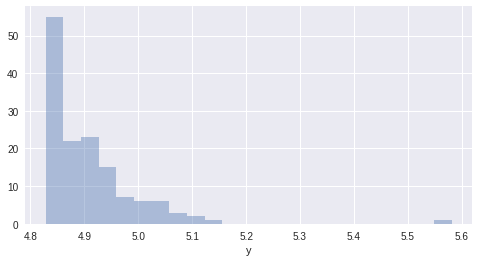

In [105]:
#filter Series
#distribution of large y values
y_large = original_y_train[original_y_train > 125]
print(y_large.shape)
y_large.head()

plt.figure(figsize=(8,4))
sns.distplot(np.log(y_large), kde=False)
plt.show()